### k-Nearest Neighbor (kNN) 


In [11]:
import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt
#from scipy.misc import imread

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# Load the raw CIFAR-10 data.
# Run the CIFAR-10 dataset load script in the folder datasets, before you run this cell
from tensorflow import keras
from tensorflow.keras.datasets import cifar10

#cifar10_dir = './datasets/cifar-10-batches-py'
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# As a sanity check, we print out the size of the training and test data.
print('Training data shape: %s' %(X_train.shape,))
print('Training labels shape: %s' %(y_train.shape,))
print('Test data shape: %s' %(X_test.shape,))
print('Test labels shape: %s' %(y_test.shape,))

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


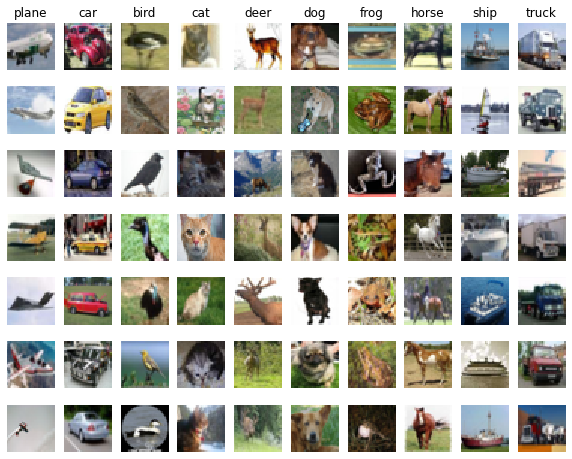

In [13]:
# Visualize some examples from the dataset.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [14]:
# Subsample the data for more efficient code execution
num_training = 5000
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


## define the KNN classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# TODO :: define the knn classifier, expect 2 lines of the code 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier()

In [17]:
y_test_pred = knn.predict(X_test)

In [19]:
# Compute and print the fraction of correctly predicted examples
num_correct = 0
for i in range(len(y_test_pred)):
    if y_test_pred[i] == y_test[i]:
        num_correct += 1
print(num_correct)
accuracy = float(num_correct) / num_test
print('%d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

139
139 / 500 correct => accuracy: 0.278000


## Cross Validation

In [23]:
from sklearn.model_selection import train_test_split
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []

X_train_folds = np.array_split(X_test, 5)
y_train_folds = np.array_split(y_test, 5)

k_to_accuracies = {}

for j in range(num_folds):
    xfolds, yfolds = X_train_folds, y_train_folds
    X_foldtest, y_foldtest = xfolds[j], yfolds[j]
    X_train, y_train = np.concatenate(xfolds[:j] + xfolds[j+1:]), np.concatenate(yfolds[:j] + yfolds[j+1:])
    
    for i in k_choices:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train.ravel())
        y_test_pred = knn.predict(X_foldtest)
        
        num_correct = 0
        for k in range(len(y_test_pred)):
            if y_test_pred[k] == y_foldtest[k]:
                num_correct += 1
        accuracy = float(num_correct) / len(y_foldtest)
        if i in k_to_accuracies:
            k_to_accuracies[i].append(accuracy)
        else: k_to_accuracies[i] = [accuracy]
   
print(k_to_accuracies)

{1: [0.24, 0.21, 0.24, 0.23, 0.21], 3: [0.18, 0.21, 0.28, 0.18, 0.18], 5: [0.17, 0.21, 0.26, 0.18, 0.21], 8: [0.24, 0.2, 0.26, 0.18, 0.2], 10: [0.23, 0.22, 0.26, 0.13, 0.18], 12: [0.21, 0.23, 0.2, 0.14, 0.2], 15: [0.22, 0.24, 0.22, 0.17, 0.19], 20: [0.28, 0.25, 0.18, 0.2, 0.22], 50: [0.27, 0.23, 0.17, 0.24, 0.2], 100: [0.29, 0.27, 0.16, 0.22, 0.18]}


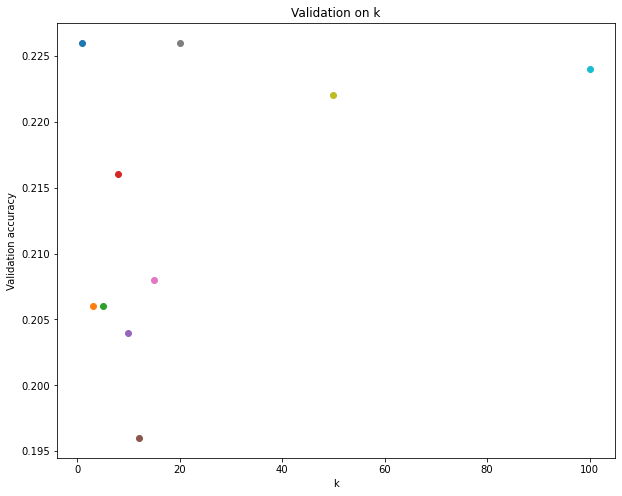

In [24]:
# plot the raw observations
from statistics import mean

for k in k_choices:
    accuracy = k_to_accuracies[k]
    plt.scatter(k, mean(accuracy))

# plot the trend line with error bars that correspond to standard deviation
plt.title('Validation on k')
plt.xlabel('k')
plt.ylabel('Validation accuracy')
plt.show()

In [10]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train.ravel())
y_test_pred = knn.predict(X_test)


num_correct = 0
for i in range(len(y_test_pred)):
    if y_test_pred[i] == y_test[i]:
        num_correct += 1
#print(num_correct)
accuracy = float(num_correct) / len(y_test)
print('Got %d / %d correct => accuracy: %f' % (num_correct, len(y_test), accuracy))

Got 3539 / 10000 correct => accuracy: 0.353900
